In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [32]:
df = pd.read_csv('dataset_malin.csv')

In [33]:
np.random.seed(200) 
k = 3

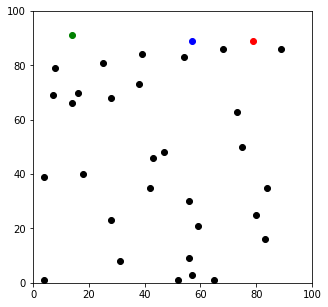

In [41]:
centroids = {
    i+1: [np.random.randint(0, 100), np.random.randint(0, 100)]
    for i in range(k)
}

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

   No   x   y  distance_from_1  distance_from_2  distance_from_3  closest  \
0   1  18  40        78.243211        51.156622        62.625873        2   
1   2  28  23        83.408633        69.426220        72.090221        2   
2   3  57   3        88.769364        97.943861        86.000000        3   
3   4  75  50        39.204592        73.498299        42.953463        1   
4   5  39  84        40.311289        25.961510        18.681542        3   

  color  
0     g  
1     g  
2     b  
3     r  
4     b  


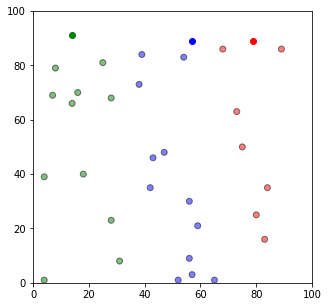

In [42]:
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
                
df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
            plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

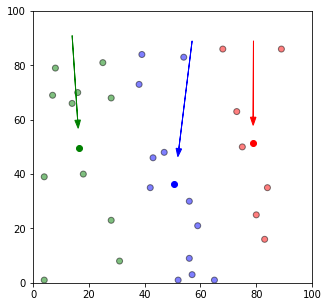

In [43]:
#update centroid

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 100)
plt.ylim(0, 100)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()    

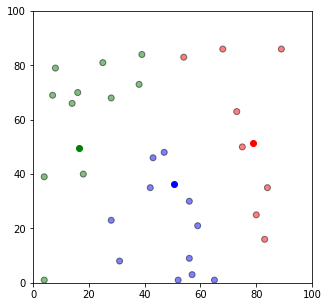

In [45]:
# repeat 

df = assignment(df, centroids)

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

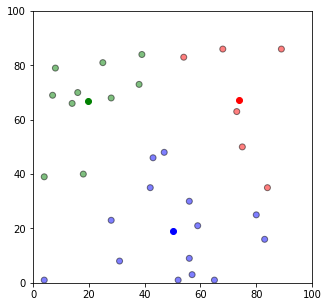

In [46]:
#continue untill all categorise dont change any more

while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df,centroids)
    if closest_centroids.equals(df['closest']):
        break
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [47]:
#menggunakan library python
df = pd.read_csv('dataset_malin.csv')

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

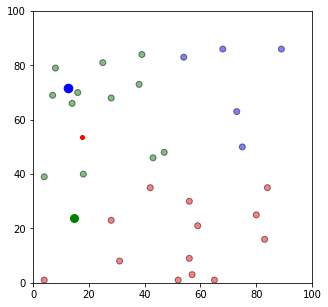

In [52]:
fig = plt.figure(figsize=(5, 5))

colors =  map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()